# Visualización de Datos

## Diagramas de dispersión

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Cargar y examinar los datos

Trabajaremos con un conjunto de datos (*sintéticos*) de cargos de seguros, para ver si podemos entender por qué algunos clientes pagan más que otros.

![tut3_insurance](https://i.imgur.com/1nmy2YO.png)

Si lo desea, puede leer más sobre el conjunto de datos [aquí](https://www.kaggle.com/noordeen/insurance-premium-prediction).

In [2]:
# Ruta del archivo a leer
insurance_filepath = "./input/insurance.csv"

# Lee el archivo en la variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

Como siempre, verificamos que el conjunto de datos se haya cargado correctamente imprimiendo las primeras cinco filas.

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Gráfico de dispersión

Para crear un diagrama de dispersión simple, utilizamos el comando `sns.scatterplot` y especificamos los valores para:

+ el eje horizontal x (`x = insurance_data['bmi']`), y
+ el eje vertical y (`y = insurance_data['cargos']`).

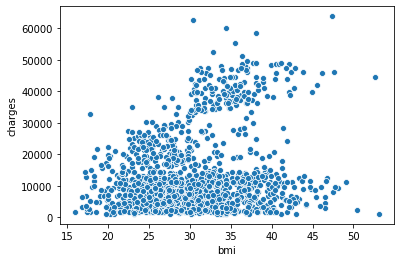

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges']);

El diagrama de dispersión anterior sugiere que el [índice de masa corporal](https://es.wikipedia.org/wiki/%C3%8Dndice_de_masa_corporal) (BMI) y los cargos de seguro están **correlacionados positivamente**, donde los clientes con un IMC más alto también suelen pagar más en costos de seguro. (*Este patrón tiene sentido, ya que el IMC alto generalmente se asocia con un mayor riesgo de enfermedad crónica*).

Para verificar la fuerza de esta relación, es posible que queramos agregar una **línea de regresión** o la línea que mejor se ajuste a los datos. Hacemos esto cambiando el comando a `sns.regplot`.

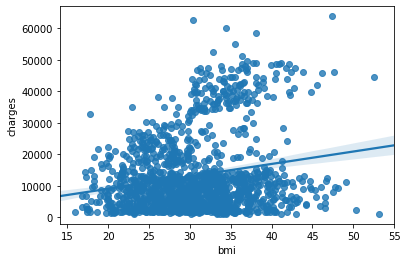

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges']);

### Gráficos de dispersión codificados por colores

Podemos usar diagramas de dispersión para mostrar las relaciones entre (*no dos, sino...*) tres variables. Una forma de hacerlo es codificando los puntos por colores.

Por ejemplo, para comprender cómo el tabaquismo afecta la relación entre el IMC y los costos del seguro, podemos codificar por color los puntos por `'smoker'` y trazar las otras dos columnas (`'bmi'`, `'cargos'`) en los ejes.

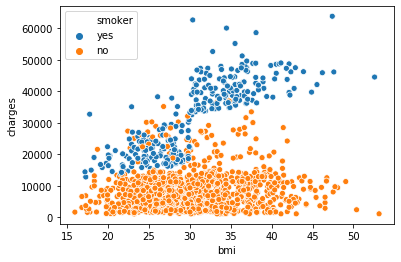

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker']);

Este diagrama de dispersión muestra que, si bien los no fumadores tienden a pagar un poco más con el aumento del IMC, los fumadores pagan MUCHO más.

Para enfatizar aún más este hecho, podemos usar el comando `sns.lmplot` para agregar dos líneas de regresión, correspondientes a fumadores y no fumadores. (*Notarás que la línea de regresión para los fumadores tiene una pendiente mucho más pronunciada, en relación con la línea para los no fumadores*)

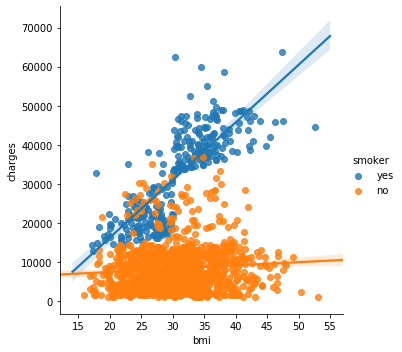

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data);

El comando `sns.lmplot` anterior funciona de manera ligeramente diferente a los comandos que hemos aprendido hasta ahora:

+ En lugar de configurar `x = insurance_data['bmi']` para seleccionar la columna `'bmi'` en `insurance_data`, establecemos `x = "bmi"` para especificar solo el nombre de la columna.
+ Del mismo modo, `y = "charges"` y `hue = "smoker"` también contienen los nombres de las columnas.
+ Especificamos el conjunto de datos con `data = insurance_data`.

Finalmente, hay una gráfica más sobre la que aprenderemos, que podría verse ligeramente diferente de cómo estás acostumbrado a ver diagramas de dispersión. Usualmente, usamos diagramas de dispersión para resaltar la relación entre dos variables continuas (como `"bmi"` y `"charges"`). Sin embargo, podemos adaptar el diseño del diagrama de dispersión para presentar una variable categórica (como `"smoker"`) en uno de los ejes principales. Nos referiremos a este tipo de diagrama como un **diagrama de dispersión categórico** y lo construiremos con el comando `sns.swarmplot`.

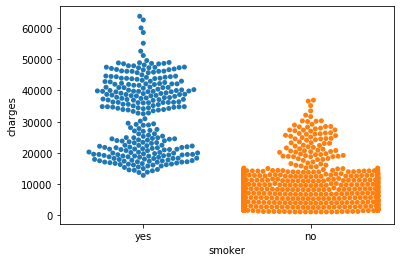

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges']);

Entre otras cosas, esta gráfica nos muestra que:

+ en promedio, a los no fumadores se les cobra menos que a los fumadores, y
+ los clientes que pagan más son fumadores; mientras que los clientes que pagan menos son no fumadores.

## Ejercicio

En este ejercicio, utilizaremos estos nuevos conocimientos para proponer una solución a un escenario del mundo real.

### Escenario

Trabajas para un importante productor de dulces y tu objetivo es escribir un informe que tu empresa pueda usar para guiar el diseño de su próximo producto. Poco después de comenzar tu investigación, se topa con este [conjunto de datos muy interesante](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) que contiene los resultados de una encuesta divertida para recaudar dulces.

## Configuración

In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Paso 1: Cargar los datos

Lee el archivo de datos de dulces en `candy_data`. Usa la columna `"id"` para etiquetar las filas.

In [13]:
# Ruta del archivo a leer
candy_filepath = "./input/candy.csv"

# Lee el archivo en la variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

### Paso 2: Revisar los datos

Usa un comando de Python para imprimir las primeras cinco filas de los datos.

In [12]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


El conjunto de datos contiene 83 filas, donde cada una corresponde a una barra de chocolate diferente. Hay 13 columnas:
- `"competitorname"` contiene el nombre de la barra de chocolate.
- Las siguientes **9** columnas (de `"chocolate"` a `"pluribus"`) describen el dulce. Por ejemplo, las filas con dulces de chocolate tienen `"Yes"` en la columna `"chocolate"` (y los dulces sin chocolate tienen `"No"` en la misma columna).
- `"sugarpercent"` proporciona alguna indicación de la cantidad de azúcar, donde los valores más altos significan un mayor contenido de azúcar.
- `"pricepercent"` muestra el precio por unidad, en relación con los otros dulces del conjunto de datos.
- `"winpercent"` se calcula a partir de los resultados de la encuesta; valores más altos indican que el dulce fue más popular entre los encuestados.

Usa las primeras cinco filas de datos para responder las siguientes preguntas.

In [15]:
# ¿Qué dulce fue más popular entre los encuestados: '3 Musketeerss' o 'Almond Joy'?
more_popular = '3 Musketeers'

# ¿Qué dulce tiene mayor contenido de azúcar: 'Air Heads' o 'Baby Ruth'?
more_sugar = 'Air Heads'

### Paso 3: El papel del azúcar

¿Las personas tienden a preferir los dulces con mayor contenido de azúcar?

#### Parte A

Crea un diagrama de dispersión que muestre la relación entre `"sugarpercent"` (en el eje x horizontal) y `"winpercent"` (en el eje vertical y). _No agregue una línea de regresión todavía, ¡lo hará en el siguiente paso! _

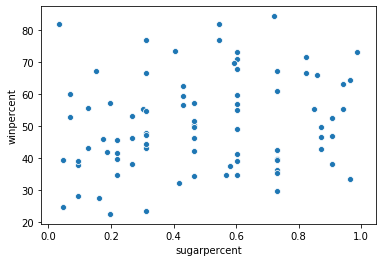

In [17]:
# Diagrama de dispersión mostrando la relación entre 'sugarpercent' y 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent']);

#### Parte B

¿El diagrama de dispersión muestra una correlación **fuerte** entre las dos variables? Si es así, ¿son los dulces con más azúcar relativamente más o menos populares entre los encuestados?

**Solución**: El diagrama de dispersión no muestra una fuerte correlación entre las dos variables. Como no existe una relación clara entre las dos variables, esto nos dice que el contenido de azúcar no juega un papel importante en la popularidad de los dulces.

### Paso 4: Mirar más de cerca

#### Parte A

Crea el mismo diagrama de dispersión que creaste en **Paso 3**, ¡pero ahora con una línea de regresión!

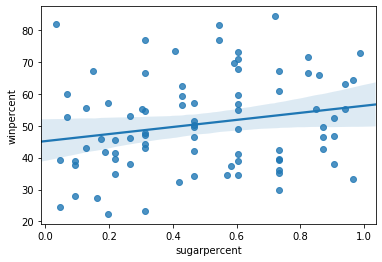

In [19]:
# Diagrama de dispersión con línea de regresión mostrando la relación entre 'sugarpercent' y 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent']);

#### Parte B

Según el gráfico anterior, ¿existe una **ligera** correlación entre `"winpercent"` y `"sugarpercent"`? ¿Qué te dice esto sobre los dulces que la gente tiende a preferir?

**Solución**: Dado que la línea de regresión tiene una pendiente ligeramente positiva, esto nos dice que existe una correlación ligeramente positiva entre `winpercent` y `sugarpercent`. Por lo tanto, las personas tienen una ligera preferencia por los dulces que contienen relativamente más azúcar.

### Paso 5: ¡Chocolate!

Crea un diagrama de dispersión para mostrar la relación entre `"pricepercent"` (en el eje horizontal x) y `"winpercent"` (en el eje vertical y). Usa la columna `"chocolate"` para codificar por color los puntos. _No agregues ninguna línea de regresión todavía, ¡lo harás en el siguiente paso!_

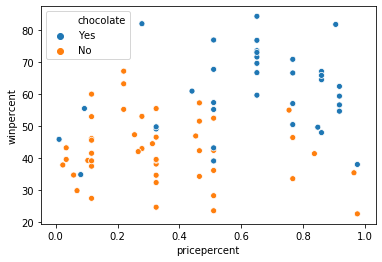

In [20]:
# Diagrama de dispersión mostrando la relación entre 'pricepercent', 'winpercent', y 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate']);

¿Puedes ver algún patrón interesante en el diagrama de dispersión? ¡Investigaremos más esta gráfica agregando líneas de regresión en el siguiente paso!

## Paso 6: Investiga el chocolate

#### Parte A

Crea el mismo diagrama de dispersión que creaste en el **Paso 5**, pero ahora con dos líneas de regresión, correspondientes a (1) dulces de chocolate y (2) dulces sin chocolate.

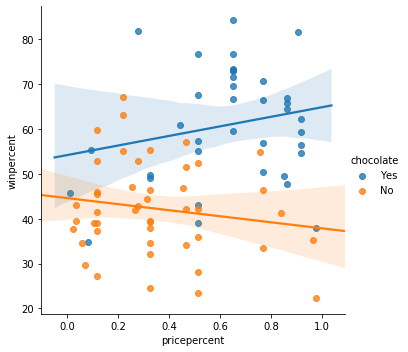

In [21]:
# Diagrama de dispersión con codificación por colores con líneas de regresión
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data);

#### Parte B

Usando las líneas de regresión, ¿qué conclusiones puedes sacar sobre los efectos del chocolate y el precio en la popularidad de los dulces?

**Solución**: Comenzaremos con la línea de regresión para los dulces de chocolate. Dado que esta línea tiene una pendiente ligeramente positiva, podemos decir que los dulces de chocolate más caros tienden a ser más populares (que los dulces de chocolate relativamente más baratos). Del mismo modo, dado que la línea de regresión para los dulces sin chocolate tiene una pendiente negativa, podemos decir que si los dulces no contienen chocolate, tienden a ser más populares cuando son más baratos. Sin embargo, una nota importante es que el conjunto de datos es bastante pequeño, por lo que no debemos invertir demasiada confianza en estos patrones. Para inspirar más confianza en los resultados, deberíamos agregar más dulces al conjunto de datos.

### Paso 7: Todos aman el chocolate.

#### Parte A

Crea un diagrama de dispersión categórico para resaltar la relación entre `"chocolate"` y `"winpercent"`. Coloca `"chocolate"` en el eje x (horizontal) y `"winpercent"` en el eje y (vertical).

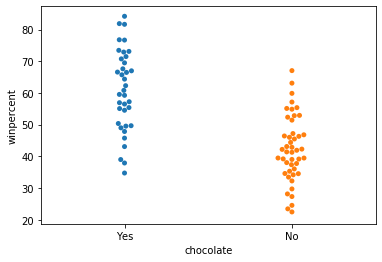

In [22]:
sns.swarmplot(x=candy_data['chocolate'],
              y=candy_data['winpercent']);

#### Parte B

Decide dedicar una sección de tu informe al hecho de que los dulces de chocolate tienden a ser más populares que los dulces sin chocolate. ¿Qué argumento es más apropiado para contar esta historia: el argumento del **Paso 6**, o el argumento del **Paso 7**?

**Solución**: en este caso, el diagrama de dispersión categórico del **Paso 7** es el diagrama más apropiado. Si bien ambas gráficas cuentan la historia deseada, la trama del **Paso 6** transmite mucha más información que podría distraer del punto principal.